<a href="https://colab.research.google.com/github/Achuna/Climate-Data-UMBC-Summer-Research/blob/master/Notebooks/Data_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preperation

Read in csv file, group data and make outputs

In [0]:
import pandas as pd

#grab raw csv file from git repository and store it into a dataframe

url = "https://raw.githubusercontent.com/Achuna/DataPractice/master/weather_data.csv"
df = pd.read_csv(url)
df


,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [0]:
# group data by the different cities and prints information for inputted city

cityGroups = df.groupby('city')

for city in cityGroups:
  print (city)

cityGroups.get_group('new york')

('mumbai',         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain)
('new york',         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny)
('paris',          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy)


,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny


In [0]:
#looks at numerical columns and provides uselful information such as:
# the mean, standard deviation, max, min, percentiles, etc.


ny = cityGroups.get_group('new york')

ny.describe()


,temperature,windspeed
count,4.000000,4.000000
mean,32.250000,8.000000
std,3.304038,2.708013
min,28.000000,6.000000
25%,31.000000,6.750000
50%,32.500000,7.000000
75%,33.750000,8.250000
max,36.000000,12.000000


# Data Isolation

This section focuses on isolating and puting bounds on data within the dataframe (slicing)

In [0]:
 #prints out temperature and wind column
df[["temperature", "city"]] #isolates two columns

,temperature,city
0,32,new york
1,36,new york
2,28,new york
3,33,new york
4,90,mumbai
5,85,mumbai
6,87,mumbai
7,92,mumbai
8,45,paris
9,50,paris


In [0]:
df[3:6] #colon is used to define the rows we wish to look at

,day,city,temperature,windspeed,event
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog


In [0]:
df.loc[1, ['windspeed']] #retrieved data from specified row and column coordinates

windspeed    7
Name: 1, dtype: object

In [0]:
#when specifiying columns always surround in brackets. rows do not need brackets only colons

df.iloc[1:3, [1,2,3]] #index location recieved by a range of indices 

#df.loc[5:8, ['day','city']]

# array = df['city']
# for i in range(0, len(array)):
#   print (array[i])

,city,temperature,windspeed
1,new york,36,7
2,new york,28,12


# Data Filtering

In [0]:
#use conditional statements to filter out unwanted data
df1 = df [ df['temperature'] > 50]  # here we are prining out temperatures that are greater than 50
df1

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
10,1/3/2017,paris,54,8,Cloudy


In [0]:
newdf = df[df['event'] == "Sunny"]
newdf

,day,city,temperature,windspeed,event
1,1/2/2017,new york,36,7,Sunny
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
8,1/1/2017,paris,45,20,Sunny


# Data Assignment

In [0]:
df.loc[:, ['windspeed']] = 3 #assigns all rows in windspeed with 3
df.head() #prints first 5 rows

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,3,Rain
1,1/2/2017,new york,36,3,Sunny
2,1/3/2017,new york,28,3,Snow
3,1/4/2017,new york,33,3,Sunny
4,1/1/2017,mumbai,90,3,Sunny


#New Data and Operations

In [0]:
df['new column'] = (df.temperature + df.windspeed) #adds a new column
df

,day,city,temperature,windspeed,event,new column
0,1/1/2017,new york,32,3,Rain,35
1,1/2/2017,new york,36,3,Sunny,39
2,1/3/2017,new york,28,3,Snow,31
3,1/4/2017,new york,33,3,Sunny,36
4,1/1/2017,mumbai,90,3,Sunny,93
5,1/2/2017,mumbai,85,3,Fog,88
6,1/3/2017,mumbai,87,3,Fog,90
7,1/4/2017,mumbai,92,3,Rain,95
8,1/1/2017,paris,45,3,Sunny,48
9,1/2/2017,paris,50,3,Cloudy,53


# Sorting Data

In [0]:
df.sort_values('temperature', ascending=True) #sorts temp data in acsending order
df

,day,city,temperature,windspeed,event,new column
0,1/1/2017,new york,32,3,Rain,35
1,1/2/2017,new york,36,3,Sunny,39
2,1/3/2017,new york,28,3,Snow,31
3,1/4/2017,new york,33,3,Sunny,36
4,1/1/2017,mumbai,90,3,Sunny,93
5,1/2/2017,mumbai,85,3,Fog,88
6,1/3/2017,mumbai,87,3,Fog,90
7,1/4/2017,mumbai,92,3,Rain,95
8,1/1/2017,paris,45,3,Sunny,48
9,1/2/2017,paris,50,3,Cloudy,53


# Data Visualization

**Tutorial on Matplotlib**

In [0]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/MbKrSmoMads" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

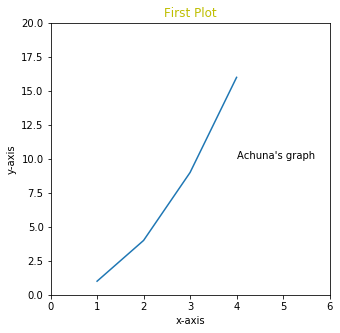

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5)) #size of the figure (2 in wide, 5 inch tall)

plt.plot([1,2,3,4], [1,4,9,16]) # x and y values; Third argument used for dot and color (ex. 'bo' - blue dots)
plt.title("First Plot", fontsize=12, color='y')

plt.axis([0, 6, 0, 20]) #bounds on x and y

plt.xlabel("x-axis") #labels for axis
plt.ylabel("y-axis")

plt.annotate("Achuna's graph", (4,10))

plt.show()

**Bar Charts**

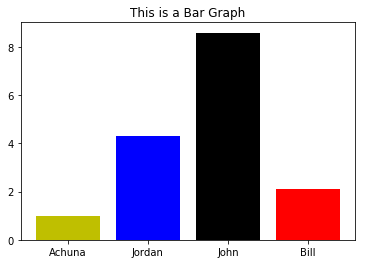

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(4) #four labels on the x axis
y = [1.0, 4.3, 8.6, 2.1]

plt.title('This is a Bar Graph')
plt.xticks(x, ('Achuna', 'Jordan', 'John', 'Bill'))
plt.bar(x,y, color=['y','b','k','r'])


plt.show()

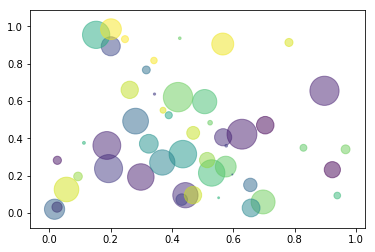

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N=50
x = np.random.rand(N) #50 random numbers
y = np.random.rand(N)
colors = np.random.rand(N)
sizes = (30* np.random.rand(N))**2

plt.scatter(x, y, s=sizes, c=colors, alpha=0.5) #alpha is transparency

plt.show()

# Reading & Plotting Data

**Reading in CSV and Ploting it**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Achuna/DataPractice/master/admission_data.csv"

df = pd.read_csv(url)
df = df.drop(['Serial No.'], axis=1) #this is how you frop a column

newNames = {'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'Rating', 'SOP':'SOP', 'LOR':'LOR', 'CGPA':'GPA', 'Research':'Research', 'Chance of Admit ':'Chance'}
df = df.rename(columns=newNames)

df.head()


,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
df.describe()

,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


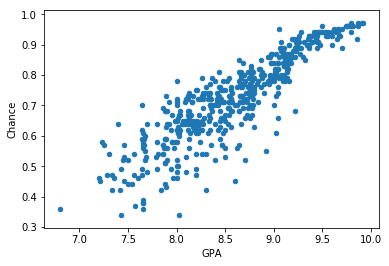

In [0]:
df.plot(kind="scatter", x='GPA', y='Chance') #use plot method and specify what you want to plot

# Learning From Data

**Linear Regression and Algorithms!   [Great Resource](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)**

In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

# Load the boston dataset
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'] # Declare the columns names

boston = datasets.load_boston() # Call the boston dataset from sklearn

df = pd.DataFrame(boston.data, columns=columns) # load the dataset as a pandas data frame

y = boston.target # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2,random_state=3) #change random_state to randomize split on program start

#test size 0.2 means 80% in training set and 20% in test set
print (X_train.shape, y_train.shape) #prints (404, 13) (404,) -> 404 rows and 13 col (2D array) || 404 target values in an array for each row
print (X_test.shape, y_test.shape)  #prints (102, 13) (102,) -> 102 rows and 13 col (2D array) || 102 target values in an array

print(boston)

(404, 13) (404,)
(102, 13) (102,)
{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
    

In [0]:
# fit a model

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train) #fitting the data with the target data (USING TRAINING DATA)

predictions = lm.predict(X_test) #Use model to predict the target data of the test dataset

print(predictions[1]) #play around and see how the predictsions derived from the training model compares to the true values in the test data
print(y_test[1])

18.764836013334527
17.1


Model Accuracy Score: 0.7952617563243856
Mean Squared Error/Deviation:  16.943073013833807


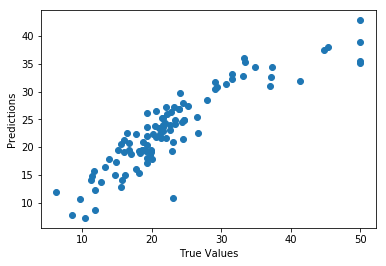

In [0]:

plt.scatter(y_test, predictions)

plt.xlabel("True Values")
plt.ylabel("Predictions")

print ("Model Accuracy Score:", model.score(X_test, y_test))
print("Mean Squared Error/Deviation: ", np.mean((predictions - y_test)**2)) #Average deviation from true values


plt.show()
#As you update the model, get better data, and change parameters you will notice that the mean squared error decreases

**Cross Validation**

But train/test split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

![alt text](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)

**Cross Validation Techniques**

there are several cross validation techniques to choose from

**K-Folds Cross Validation**

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.


# Practice Playground


[74 46 19 42 63 20 37 52 27 65 52  9  3 17 61 48 56 13 28 88 62 47 79 20
 75 62 40 58 33 54 53 96 45 71 80 59 28 99 88 89 15 28 81 25 50 35 31 99
 45  3 22 43 90  6 93 52 50 21 45 85 69 50 16  2 60 73  3 28 81  2  1 85
 37 34 26 99 51 26 38  9 72 73 87 54 58 81 49 24 85 90 85 67 82 18 26 74
 42 61 75 71 21 35  5 52  5 95 12 60 28 49 33 69 22 93 52  1 64 62 57 75
 81 73 71 25 54  9 72 37 54 15 93 78 24 96 56 71  9 79 12 81 85 25 24 78
 73 73 43 12 48 77 10 85 59 41 33 39 24 22 45 95 34 63 28 45 70 39  9 90
 18 48  9 61 54 98 44 31 53 39 31  9 67 53 10 75 17 91 49 31 43 30 47 10
 98 20 91 29 46 39 64 70 35 86 35 20 81 80 90 99 28 52 65 75 42 12 90 45
 77 84 39  9 84 55 69 28 64 73 47 63 58 12 68 77 51 82 29 93 25 88 43 61
 67 49 63 30 89 26 98 74 14  1 75 87 59 65 36 44 31 69 12 89 95 29 98 76
 12 57  1 76  3 56 79  4 99 23  9  5 57  4 20 90 30 83 62 65 96 67 62 55
 96 65 45 54 76 69 99 74 89  5 37 41 73 85 81 65 51 30 17 76 75 41  7 97
 45 73  2 14 17  2 79 37 16 38 78  6 88 88 34 80 87

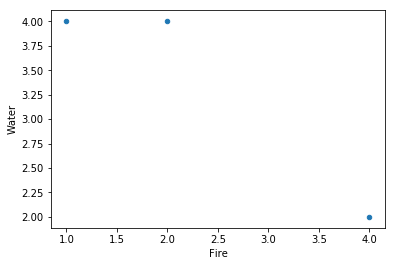

In [0]:
import pandas as pd
import matplotlib as plt
import numpy as np

columns = "Fire Electricity Water Earth".split()

row = np.random.randint(low=1, high=100, size=500)

print(row)

df = pd.DataFrame([[2,3,4,5],
                   [1,6,4,8],
                   [4,7,2,3]], columns=columns) #creating your own dataframe without csv file

df = df.iloc[: , [0,1,2]]

df.plot(kind="scatter", x='Fire', y='Water')